In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [2]:
# reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# preparing data
y_train = train["label"]
x_train = train.iloc[:,1:]
x_train = x_train / 255.0  # data range [0, 1]
x_test = test / 255.0      # data range [0, 1]
#x_train = x_train.values.reshape(-1,28,28,1)   # input image dimensions: 28*28*1
#x_test = x_test.values.reshape(-1,28,28,1)
y_train = keras.utils.to_categorical(y_train, num_classes = 10)  # convert a class vector (integers) to binary class matrix
print('training data shape', x_train.shape)
print('testing data shape', x_test.shape)
print('training result shape', y_train.shape)
print('training result example', y_train[0])

training data shape (42000, 784)
testing data shape (28000, 784)
training result shape (42000, 10)
training result example [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


KeyError: 0

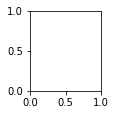

In [6]:
# preview some images
plt.figure(figsize=(15,5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

In [16]:
# preparing training and testing data for model validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1)

KNN

In [ ]:
k_range = range(1,10)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_val)
    scores.append(accuracy_score(Y_val,y_pred))
    print('k {} completed'.format(k))
    

# Plotting testing accuracy
plt.plot(k_range,scores)
plt.xlabel('K')
plt.ylabel('Accuracy on Validation Data')

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
y_pred = knn.predict(X_val)
accuracy = (y_pred == Y_val).mean()
accuracy

0.9937380952380952

Random Forest

Start learning...
10


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


15


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


20


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


25


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


30


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


40


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


50


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


70


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


100


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


150


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Score:  [0.82145503 0.85907407 0.8452381  0.86185185 0.85190476 0.86010582
 0.86124339 0.86407407 0.86730159 0.86833333]
Std  :  [0.00342672 0.00218442 0.0041574  0.00253417 0.00210679 0.00402203
 0.00272808 0.00247634 0.00308675 0.00177584]


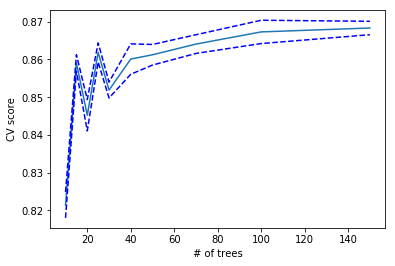

In [27]:
    scores = list()
    scores_std = list()

    print('Start learning...')
    n_trees = [10, 15, 20, 25, 30, 40, 50, 70, 100, 150]
    for n_tree in n_trees:
        print(n_tree)
        recognizer = RandomForestClassifier(n_tree)
        score = cross_val_score(recognizer, X_train, Y_train)
        scores.append(np.mean(score))
        scores_std.append(np.std(score))

    sc_array = np.array(scores)
    std_array = np.array(scores_std)
    print('Score: ', sc_array)
    print('Std  : ', std_array)

    #plt.figure(figsize=(4,3))
    plt.plot(n_trees, scores)
    plt.plot(n_trees, sc_array + std_array, 'b--')
    plt.plot(n_trees, sc_array - std_array, 'b--')
    plt.ylabel('CV score')
    plt.xlabel('# of trees')
    plt.savefig('cv_trees.png')

CNN

In [7]:
# model parameters
batch_size = 128
epochs = 20
num_classes = 10

In [8]:
# CNN architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# preparing training and testing data for model validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [10]:
# Another important method to improve generalization is augmentation, not implemented yet
#hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
#                           steps_per_epoch=500,
#                           epochs=20, 
#                           verbose=2,  
#                           validation_data=(x_val[:400,:], y_val[:400,:]),
#                           callbacks=[annealer])

In [11]:
# evaluating the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, Y_val))
score = model.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 106s 3ms/step - loss: 0.5569 - acc: 0.8184 - val_loss: 0.1097 - val_acc: 0.9707
Epoch 2/20
37800/37800 [==============================] - 95s 3ms/step - loss: 0.1374 - acc: 0.9603 - val_loss: 0.0806 - val_acc: 0.9798
Epoch 3/20
37800/37800 [==============================] - 105s 3ms/step - loss: 0.0943 - acc: 0.9728 - val_loss: 0.0692 - val_acc: 0.9817
Epoch 4/20
37800/37800 [==============================] - 103s 3ms/step - loss: 0.0789 - acc: 0.9782 - val_loss: 0.0460 - val_acc: 0.9898
Epoch 5/20
37800/37800 [==============================] - 102s 3ms/step - loss: 0.0665 - acc: 0.9810 - val_loss: 0.0470 - val_acc: 0.9886
Epoch 6/20
37800/37800 [==============================] - 94s 2ms/step - loss: 0.0567 - acc: 0.9838 - val_loss: 0.0419 - val_acc: 0.9902
Epoch 7/20
37800/37800 [==============================] - 97s 3ms/step - loss

In [15]:
# visualizing confusion matrix 
Y_model = model.predict(X_val)
Y_pred = np.argmax(Y_model, axis=1)
Y_true = np.argmax(Y_val, axis=1)
cm = confusion_matrix(Y_true, Y_pred)
print(cm)
#sn.set(font_scale=1.4)
#sn.heatmap(cm, annot=True)

[[396   0   0   0   0   0   0   0   0   0]
 [  0 469   0   0   0   0   1   0   1   0]
 [  0   2 413   1   0   0   0   2   0   0]
 [  0   0   0 436   0   2   0   1   2   1]
 [  0   0   2   0 426   0   0   0   0   0]
 [  0   0   0   0   0 373   3   0   2   0]
 [  1   0   0   0   0   0 394   0   0   0]
 [  0   2   1   0   0   0   0 454   0   1]
 [  0   0   0   0   1   0   0   0 398   2]
 [  1   0   0   0   3   0   0   2   2 405]]


In [13]:
# model prediction 
y_test = model.predict(x_test, batch_size=64)
y_res = np.argmax(y_test,axis=1)

In [14]:
# write results to csv file
results = pd.Series(y_res,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("CNN_results.csv",index=False)